|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) + [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html) +  [WIRED Global Center](https://resilience.utah.edu/) <br> created by [Valerio Pascucci](http://cedmav.org/) & [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)   |![nsdf](images/NSDF-smaller.png)  |![NASA](images/NASA.png)| ![wired](images/wired-logo-small.png) |
|:---|:---:|:---:|---:|

## Uncomment the line below if any library is missing

In [1]:
#!pip install --upgrade openvisuspy numpy matplotlib

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

try:
  import OpenVisus as ov
except:
  sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
  import OpenVisus as ov

os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./.visus_cache")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])
os.makedirs(os.environ["VISUS_CACHE"],exist_ok=True)

output_dir = ".output"
os.makedirs(output_dir,exist_ok=True)

VISUS_CACHE is  ./.visus_cache


## Load the data **`dataset_name`** into the numpy array **`data`**

In [2]:
model = "ACCESS-CM2"

variables = {
    "hurs":    "Near-Surface Relative Humidity",
    "huss":    "Near-Surface Specific Humidity",
    "pr":      "Precipitation",
    "rlds" :   "Surface Downwelling Longwave Radiation",
    "rsds":    "Surface Downwelling Shortwave Radiation",
    "sfcWind": "Daily-Mean Near-Surface Wind Speed",
    "tas":     "Daily Near-Surface Air Temperature",
    "tasmax":  "Daily Maximum Near-Surface Air Temperature",
    "tasmin":  "Daily Minimum Near-Surface Air Temperature"
}

variable  = "tas" 

year = 2020 
# 2015 is the year whne the data switches from historical to simulated
scenario = "historical" if year < 2015 else "ssp585"

# Open (connect to) dataset
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")

# Corresponds to July 21. See https://nsidc.org/data/user-resources/help-center/day-year-doy-calendar
day_of_the_year = 202 
timestep =year*365 + day_of_the_year
quality = 0  # 0 = load full resolution (-4 coarse, -8 coarser)
data=db.read(time=timestep,quality=quality) #load anta in a numpy array
np.info(data) # print array information

class:  ndarray
shape:  (600, 1440)
strides:  (5760, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x22e57bc0040
byteorder:  little
byteswap:  False
type: float32


## Plot the data if you like

In [3]:
# Determine the appropriate scenario based on the year
year = 2020
# Specify the month and day
month = 7  # July
day = 21

# Specify the latitude and longitude
latitude = 39.53  # Example: UTAH latitude
longitude = -111.47  # Example: UTAH longitude

# Specify the latitude and longitude
#latitude = 45  # Example: UTAH latitude
#longitude = 180  # Example: UTAH longitude

# Function to convert latitude and longitude to array indices
def latlon_to_indices(lat, lon, lat_size=600, lon_size=1440):
    while lat <-90: lat = lat + 180
    while lat > 90: lat = lat - 180
    lat_index = lat_size//2 + int(lat/90*(lat_size//2))  # 90 degrees N to -90 degrees S
    while lon <  0: lon = lon + 360
    while lon >360: lon = lon - 360
    lon_index = int(lon/360*lon_size)  # 0 degrees to 360
    return lat_index, lon_index

# Convert latitude and longitude to array indices
lat_index, lon_index = latlon_to_indices(latitude, longitude)

In [4]:
print(lat_index, lon_index)
#lon_index = (180 + longitude)/180*1440
print(lat_index, lon_index)

431 994
431 994


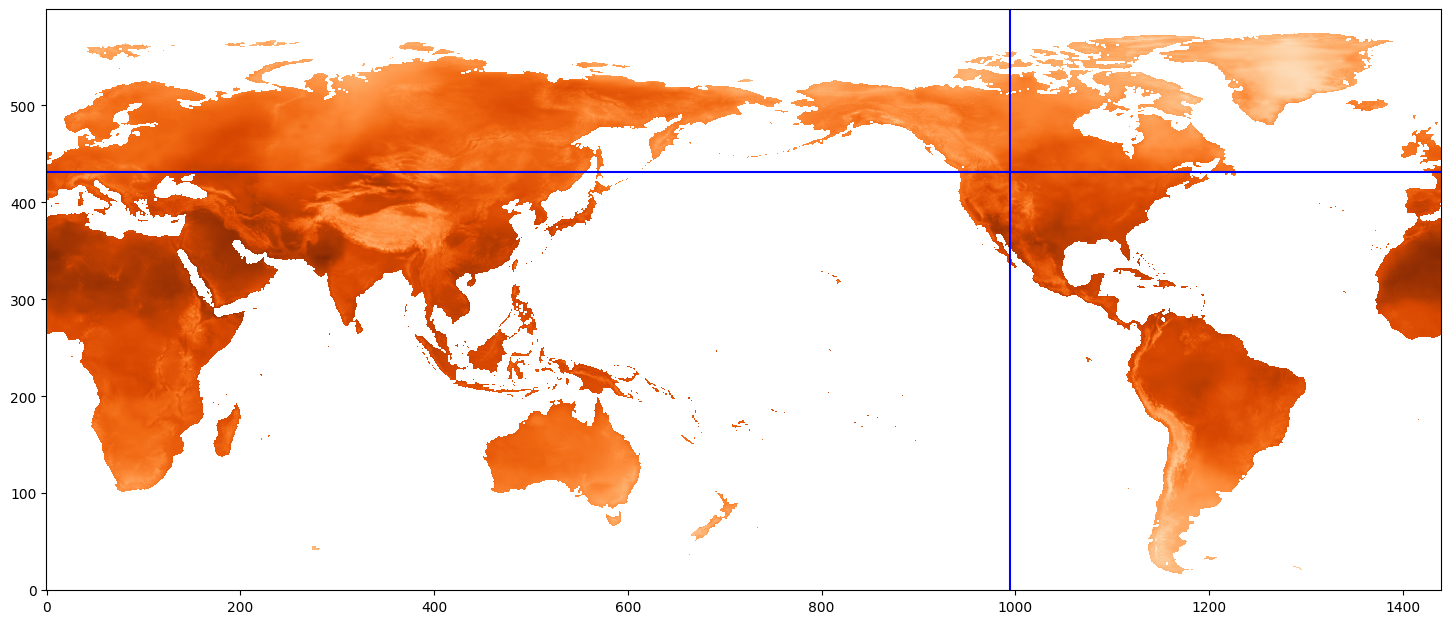

252.50864 315.9895


In [5]:
my_cmap = 'Oranges'
plt.subplots(figsize=(18,9))
plt.imshow(data, cmap=my_cmap,origin='lower') # matplotlib puts the origin on the top left instead of bottom left
plt.savefig(os.path.join(output_dir,"cmip6_IDX_09_read_data_map_location.png"))
# only one line may be specified; full height
plt.axvline(x = lon_index, color = 'b')
plt.axhline(y = lat_index, color = 'b')
plt.show()
print(np.nanmin(data),np.nanmax(data))